In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)

In [2]:
# data_df=pd.read_csv("data_df_train.csv")
# data_df.drop(columns="Unnamed: 0",inplace=True)

In [3]:
# data_df.shape

In [4]:
# y = data_df[['SalePrice']]
# X = data_df[list(set(data_df.columns) - set(['SalePrice']))]

In [5]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
# X_train=np.array(X_train)
# y_train=y_train.values

In [7]:
def Batch(x,start,batch_size):
    return x[start:start+batch_size,:]

In [8]:
# X_train.shape

In [9]:
df = pd.read_csv('MultipleLR.csv',header=None)
df.head()

,0,1,2,3
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [10]:
df.shape

(25, 4)

In [11]:
X=df[[0,1,2]]
y=df[[3]]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
X_train=X_train.values
X_train

array([[ 78,  83,  85],
       [ 81,  90,  93],
       [ 96,  93,  95],
       [ 76,  83,  71],
       [ 70,  73,  78],
       [ 93,  88,  93],
       [ 69,  70,  73],
       [ 79,  80,  73],
       [ 87,  79,  90],
       [ 69,  74,  77],
       [ 88,  92,  86],
       [ 73,  66,  70],
       [ 79,  70,  88],
       [ 47,  56,  60],
       [ 82,  86,  90],
       [ 96,  98, 100],
       [ 73,  80,  75],
       [ 86,  82,  89],
       [ 93,  89,  96],
       [ 93,  95,  91]], dtype=int64)

In [14]:
y_train=y_train.values
y_train

array([[175],
       [183],
       [192],
       [149],
       [148],
       [185],
       [141],
       [152],
       [175],
       [149],
       [177],
       [142],
       [164],
       [115],
       [177],
       [196],
       [152],
       [175],
       [192],
       [184]], dtype=int64)

In [15]:
# df = pd.read_csv('RegData.csv',header=None)
# df

In [16]:
# X=df[[0]]
# y=df[[1]]

In [17]:
# X=np.linspace(0,20).reshape(-1,1)
# a=-1
# b=2

In [18]:
# y = a*X + b
# y=y.reshape(-1,1)

In [19]:
# X.shape

In [20]:
# y.shape

In [21]:
# y

In [22]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,shuffle =True)

In [23]:
# X_train=X_train.values
# y_train=y_train.values

In [24]:
# plt.scatter(X_train,y_train)

In [25]:
X_train.shape

(20, 3)

## `ADAM`

In [26]:
def fit(x_data,y_data,max_itr,alpha,beta_1,beta_2,batch_size,tolerance=1e-3):
    
    x_0=np.ones((x_data.shape[0],1))
    x_data=np.concatenate((x_0, x_data), axis=1)
    y_data=np.array(y_data).reshape(y_data.shape[0],1)
    x=x_data
    y=y_data
    cost=[]
    cost_itrs=[]
    theta=np.zeros( ((x.shape[1]),1) )
    mt=np.zeros( ((x.shape[1]),1) )
    vt=np.zeros( ((x.shape[1]),1) )
    m=x_data.shape[0]
    itr=0
    i=0
    epsilon=1e-6
    grad=[1000000]
    c_0=1e10 #asume large last cost
    c_1=1e9 # asume large current cost
    while( (itr< max_itr and abs(c_1-c_0)>tolerance)  ):
        i=i+1
        for j in range(0,m,batch_size):
            x_b=Batch(x,j,batch_size)
            y_b=Batch(y,j,batch_size)
            
            h_theta=x_b@theta
            err=(h_theta-y_b)
            cost_fun=(err.T@err)/(2*batch_size)
            cost.append(cost_fun[0][0])
            c_0=c_1
            c_1=cost_fun[0][0]
            grad= x_b.T@err/batch_size


            mt=(beta_1*mt)+((1-beta_1)*grad)
            mt=mt/( 1 - pow(beta_1, i+1) )
            vt = (beta_2*vt)+((1-beta_2)*(grad**2))
            vt=vt/( 1 - pow(beta_2, i+1) )#bias
            theta=theta-(alpha/((epsilon+vt)**0.5)) *mt
            if (len(cost)>2 and abs(cost[-2]-cost[-1])<tolerance):
                break
        
        
        cost_itrs.append(cost_fun[0][0])
        itr=itr+1
    return theta,cost,cost_itrs

In [27]:
def predict(x,w):
    x_0=np.ones((x.shape[0],1))
    x=np.concatenate((x_0, x), axis=1)
    return x@w

In [28]:
def score(y,y_predict):
    score=r2_score(y, y_predict)
    return score


In [29]:
weights,cost,cost_itrs=fit(x_data=X_train,y_data=y_train,max_itr=1000,alpha=0.01,beta_1=0.82,beta_2=0.90,batch_size=10,tolerance=1e-3)


In [30]:
len(cost)

2000

In [31]:
len(cost_itrs)

1000

In [32]:
cost[-1]

1.621315117341323

In [33]:
cost[-2]

4.098878629751425

In [34]:
y_predict=predict(X_train,weights)


In [35]:
score=r2_score(y_train, y_predict)
score

0.9870893157234244

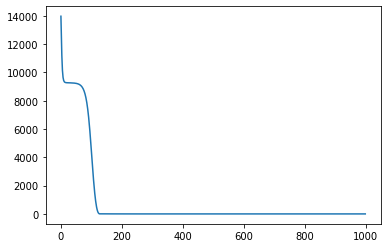

In [36]:
plt.plot(cost_itrs);

## `Adagrad`

In [37]:
def fit2(x_data,y_data,max_itr,alpha,batch_size):
    
    x_0=np.ones((x_data.shape[0],1))
    x_data=np.concatenate((x_0, x_data), axis=1)
    y_data=np.array(y_data).reshape(y_data.shape[0],1)
    x=x_data
    y=y_data
    cost=[]
    theta=np.zeros( ((x.shape[1]),1) )
    vt=np.zeros( ((x.shape[1]),1) )
    m=x_data.shape[0]
    itr=0
    i=0
    epsilon=1e-8
    grad=[1000000]
    c_0=1e10 #asume large last cost
    c_1=1e9 # asume large current cost
    while( (itr< max_itr and abs(c_1-c_0)>0.000000000001)  ):
        i=i+1
        for j in range(0,m,batch_size):
            x_b=Batch(x,j,batch_size)
            y_b=Batch(y,j,batch_size)
            
            h_theta=x_b@theta
            err=(h_theta-y_b)
            cost_fun=(err.T@err)/(2*batch_size)
            cost.append(cost_fun[0][0])
            c_0=c_1
            c_1=cost_fun[0][0]
            grad= x_b.T@err/batch_size

            vt = (vt)+(grad**2)
            theta=theta-(alpha/((epsilon+vt)**0.5)) *grad
        
        
        itr=itr+1
    return theta

In [38]:
weights=fit2(x_data=X_train,y_data=y_train,max_itr=10000,alpha=0.015,batch_size=256)


In [39]:
y_predict=predict(X_train,weights)
y_predict

array([[166.53096579],
       [178.68602719],
       [192.11859717],
       [155.63557893],
       [149.6976057 ],
       [185.39625762],
       [143.60753534],
       [157.00529836],
       [173.30308385],
       [149.01355662],
       [179.9420791 ],
       [141.56673702],
       [160.55094031],
       [110.61351533],
       [174.63313251],
       [198.87612377],
       [154.34596124],
       [173.9571898 ],
       [188.11261856],
       [188.71494461]])

In [40]:
score=r2_score(y_train, y_predict)
score

0.9693618331134013

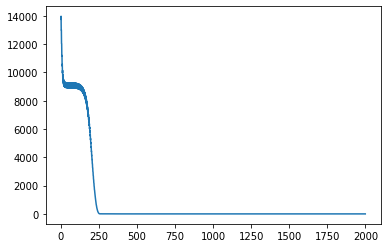

In [41]:
plt.plot(cost)

## `RMSProp`

In [42]:
def fit3(x_data,y_data,max_itr,alpha,beta,batch_size):
    
    x_0=np.ones((x_data.shape[0],1))
    x_data=np.concatenate((x_0, x_data), axis=1)
    y_data=np.array(y_data).reshape(y_data.shape[0],1)
    x=x_data
    y=y_data
    cost=[]
    theta=np.zeros( ((x.shape[1]),1) )
    mt=np.zeros( ((x.shape[1]),1) )
    vt=np.zeros( ((x.shape[1]),1) )
    m=x_data.shape[0]
    itr=0
    i=0
    epsilon=1e-8
    grad=[1000000]
    c_0=1e10 #asume large last cost
    c_1=1e9 # asume large current cost
    while( (itr< max_itr and abs(c_1-c_0)>0.000000000001)  ):
        i=i+1
        for j in range(0,m,batch_size):
            x_b=Batch(x,j,batch_size)
            y_b=Batch(y,j,batch_size)
            
            h_theta=x_b@theta
            err=(h_theta-y_b)
            cost_fun=(err.T@err)/(2*batch_size)
            cost.append(cost_fun[0][0])
            c_0=c_1
            c_1=cost_fun[0][0]
            grad= x_b.T@err/batch_size

            vt = (beta*vt)+((1-beta)*(grad**2))
            theta=theta-(alpha/((epsilon+vt)**0.5)) *grad
        
        
        itr=itr+1
    return theta

In [43]:
weights=fit3(x_data=X_train,y_data=y_train,max_itr=10000,alpha=0.001,beta=0.98,batch_size=64)


In [44]:
y_predict=predict(X_train,weights)
y_predict

array([[167.89156032],
       [181.94305199],
       [190.88854337],
       [150.07119837],
       [151.97410197],
       [185.10682252],
       [144.12561006],
       [152.15495297],
       [175.2298398 ],
       [150.87144603],
       [176.68287064],
       [139.96674134],
       [165.89569328],
       [114.24425022],
       [176.76211774],
       [199.32083833],
       [152.55924834],
       [175.05167543],
       [189.24170792],
       [185.89411658]])

In [45]:
score=r2_score(y_train, y_predict)
score

0.9870406844139213

## `Momentum`

In [46]:
def fit4(x_data,y_data,max_itr,alpha,gama,batch_size):
    
    x_0=np.ones((x_data.shape[0],1))
    x_data=np.concatenate((x_0, x_data), axis=1)
    y_data=np.array(y_data).reshape(y_data.shape[0],1)
    x=x_data
    y=y_data
    cost=[]
    theta=np.zeros( ((x.shape[1]),1) )
    mt=np.zeros( ((x.shape[1]),1) )
    vt=np.zeros( ((x.shape[1]),1) )
    m=x_data.shape[0]
    itr=0
    i=0
    epsilon=1e-8
    grad=[1000000]
    c_0=1e10 #asume large last cost
    c_1=1e9 # asume large current cost
    while( (itr< max_itr and abs(c_1-c_0)>0.000000000001)  ):
        i=i+1
        for j in range(0,m,batch_size):
            x_b=Batch(x,j,batch_size)
            y_b=Batch(y,j,batch_size)
            
            h_theta=x_b@theta
            err=(h_theta-y_b)
            cost_fun=(err.T@err)/(2*batch_size)
            cost.append(cost_fun[0][0])
            c_0=c_1
            c_1=cost_fun[0][0]
            grad= x_b.T@err/batch_size

            vt = (gama*vt)+(alpha*grad)
            theta=theta-vt
        
        
        itr=itr+1
    return theta

In [47]:
weights=fit4(x_data=X_train,y_data=y_train,max_itr=10000,alpha=0.001,gama=0.98,batch_size=256)


In [48]:
y_predict=predict(X_train,weights)
y_predict

array([[167.77365636],
       [181.81969133],
       [190.73702575],
       [149.95597052],
       [151.87129556],
       [184.96109405],
       [144.02448619],
       [152.03444578],
       [175.09570255],
       [150.77037386],
       [176.54572374],
       [139.858144  ],
       [165.77697311],
       [114.18426339],
       [176.63690743],
       [199.16938533],
       [152.45014208],
       [174.91914496],
       [189.09614568],
       [185.74778872]])

In [49]:
score=r2_score(y_train, y_predict)
score

0.9870731342050509

## `NAG`

In [50]:
def fit5(x_data,y_data,max_itr,alpha,gama,batch_size):
    
    x_0=np.ones((x_data.shape[0],1))
    x_data=np.concatenate((x_0, x_data), axis=1)
    y_data=np.array(y_data).reshape(y_data.shape[0],1)
    x=x_data
    y=y_data
    cost=[]
    theta=np.zeros( ((x.shape[1]),1) )
    mt=np.zeros( ((x.shape[1]),1) )
    vt=np.zeros( ((x.shape[1]),1) )
    m=x_data.shape[0]
    itr=0
    i=0
    epsilon=1e-8
    grad=[1000000]
    c_0=1e10 #asume large last cost
    c_1=1e9 # asume large current cost
    while( (itr< max_itr and abs(c_1-c_0)>0.000000000001)  ):
        i=i+1
        for j in range(0,m,batch_size):
            x_b=Batch(x,j,batch_size)
            y_b=Batch(y,j,batch_size)
            
            h_theta=x_b@theta
            err=(h_theta-y_b)
            cost_fun=(err.T@err)/(2*batch_size)
            cost.append(cost_fun[0][0])
            c_0=c_1
            c_1=cost_fun[0][0]
            
            
            theta_temp=theta-(gama*vt)
            h_theta_temp=x_b@theta_temp
            err_temp=(h_theta_temp-y_b)
            grad_temp= x_b.T@err_temp/batch_size
            theta=theta_temp-(alpha*grad_temp)
            vt = (gama*vt)+(alpha*grad_temp)
        
        
        itr=itr+1
    return theta

In [51]:
weights=fit5(x_data=X_train,y_data=y_train,max_itr=10000,alpha=0.00001,gama=0.98,batch_size=256)


In [52]:
#for price data
# weights=fit5(x_data=X_train,y_data=y_train,max_itr=10000,alpha=0.001,gama=0.98,batch_size=256)


In [53]:
y_predict=predict(X_train,weights)
y_predict

array([[167.73083822],
       [181.63710781],
       [190.64596458],
       [150.06448618],
       [151.93780266],
       [184.91615743],
       [144.17286378],
       [152.1784744 ],
       [175.1206051 ],
       [150.82911172],
       [176.49655609],
       [140.12303524],
       [165.83997   ],
       [114.41923931],
       [176.54152819],
       [198.96627451],
       [152.51114146],
       [174.91586889],
       [189.00438865],
       [185.65582976]])

In [54]:
score=r2_score(y_train, y_predict)
score

0.9869328052990393

In [55]:
class LRMiniBatchGradientDescent():
    def __init__( self, max_itr,alpha ) : 
        self.max_itr=max_itr
        self.alpha=alpha
        
    def Batch(self,x,start,batch_size):
        return x[start:start+batch_size,:]

    def fit(self,x_data,y_data):

        x_0=np.ones((x_data.shape[0],1))
        x_data=np.concatenate((x_0, x_data), axis=1)
        y_data=np.array(y_data).reshape(y_data.shape[0],1)
        x=x_data
        y=y_data
        cost=[]
        theta=np.zeros( ((x.shape[1]),1) )
        m=x_data.shape[0]
        batch_size=64
        itr=0
        i=0
        grad=[1000000]
        c_0=1e10 #asume large last cost
        c_1=1e9 # asume large current cost
        while( (itr< self.max_itr and abs(c_1-c_0)>0.0000000001)  ):
            i=i+1

            for j in range(0,m,batch_size):

                h_theta=self.Batch(x,j,batch_size)@theta
                err=(h_theta-self.Batch(y,j,batch_size))
                cost_fun=(err.T@err)/(2*batch_size)
                cost.append(cost_fun[0][0])
                c_0=c_1
                c_1=cost_fun[0][0]

                grad= (self.Batch(x,j,batch_size).T@err)/batch_size
                theta=theta-(self.alpha*grad)
            itr=itr+1
            
        self.theta=theta-(self.alpha*grad)
        
    

    def predict(self,x):
        w=self.theta
        x_0=np.ones((x.shape[0],1))
        x=np.concatenate((x_0, x), axis=1)
        return x@w
    
    
    def score(self,y,y_predict):
        score=r2_score(y, y_predict)
        return score
    

In [56]:
#for price data
# model=LRMiniBatchGradientDescent(10000,0.001)

In [57]:
model=LRMiniBatchGradientDescent(10000,0.0001)

In [58]:
model.fit(X_train,y_train)

In [59]:
y_predict=model.predict(X_train)


In [60]:
model.score(y_train,y_predict)

0.9869310765627041

In [61]:
# pca =PCA(n_components=1)


In [62]:
# X_train_pca=pca.fit_transform(X_train)


In [63]:
# y_predict_pca=pca.transform(y_predict)


In [64]:
# scaler=MinMaxScaler()
# y_predict_s=scaler.fit_transform(y_predict)
# y_train_s=scaler.transform(y_train)


In [65]:
# plt.scatter(X_train_pca,y_train)
# plt.plot(X_train_pca,y_predict)

In [66]:
class LRMiniBatch():
    def __init__( self, max_itr,alpha,batch_size,opt,gama=None,beta=None,beta_1=None,beta_2=None,epsilon=1e-8,tolerance=1e-6) : 
        self.max_itr=max_itr
        self.alpha=alpha
        self.batch_size=batch_size
        self.opt=opt
        self.gama=gama
        self.beta=beta
        self.beta_1=beta_1
        self.beta_2=beta_2
        self.epsilon=epsilon
        self.tolerance=tolerance
        
    def Batch(self,x,start,batch_size):
        return x[start:start+batch_size,:]

    def fit(self,x_data,y_data):

        x_0=np.ones((x_data.shape[0],1))
        x_data=np.concatenate((x_0, x_data), axis=1)
        y_data=np.array(y_data).reshape(y_data.shape[0],1)
        x=x_data
        y=y_data
        cost=[]
        cost_itrs=[]
        h_theta_itrs=[]
        theta=np.zeros( ((x.shape[1]),1) )
        m=x_data.shape[0]
        vt=0
        mt=0
        itr=0
        i=0
        grad=[1000000]
        c_0=1e10 #asume large last cost
        c_1=1e9 # asume large current cost
        if self.batch_size>m:
            
            self.batch_size=m
            
        while( (itr< self.max_itr and abs(c_1-c_0)>self.tolerance)  ):
            i=i+1

            for j in range(0,m,self.batch_size):
                
                x_b=self.Batch(x,j,self.batch_size)
                y_b=self.Batch(y,j,self.batch_size)
                
                h_theta=x_b@theta
                err=(h_theta-y_b)
                cost_fun=(err.T@err)/(2*self.batch_size)
                cost.append(cost_fun[0][0])
                c_0=c_1
                c_1=cost_fun[0][0]
                grad= (x_b.T@err)/self.batch_size
                
                if (self.opt=='gd'):
                    theta=theta-(self.alpha*grad)
                    
                elif(self.opt=="momentum"):
                    vt = (self.gama*vt)+(self.alpha*grad)
                    theta=theta-vt
                    
                elif(self.opt=="nag"):
                    theta_temp=theta-(self.gama*vt)
                    h_theta_temp=x_b@theta_temp
                    err_temp=(h_theta_temp-y_b)
                    grad_temp= x_b.T@err_temp/self.batch_size
                    theta=theta_temp-(self.alpha*grad_temp)
                    vt = (self.gama*vt)+(self.alpha*grad_temp)
                    
                elif(self.opt=="rms"):
                    vt = (self.beta*vt)+((1-self.beta)*(grad**2))
                    theta=theta-(self.alpha/((self.epsilon+vt)**0.5)) *grad
                    
                elif(self.opt=="adagrad"):
                    vt = (vt)+(grad**2)
                    theta=theta-(self.alpha/((self.epsilon+vt)**0.5)) *grad
                    
                elif(self.opt=="adam"):
                    mt=(self.beta_1*mt)+((1-self.beta_1)*grad)
                    mt=mt/( 1 - pow(self.beta_1, i+1) )
                    vt = (self.beta_2*vt)+((1-self.beta_2)*(grad**2))
                    vt=vt/( 1 - pow(self.beta_2, i+1) )#bias
                    theta=theta-(self.alpha/((self.epsilon+vt)**0.5)) *mt
                    
                if (len(cost)>2 and abs(cost[-2]-cost[-1])<self.tolerance):
                    break
                    

                        
            h_theta_itr=x@theta
            h_theta_itrs.append(h_theta_itr)
            cost_itrs.append(cost_fun[0][0])

            itr=itr+1
            
        self.theta=theta-(self.alpha*grad)
        self.cost=cost
        self.cost_itrs=cost_itrs
        self.h_theta_itrs=h_theta_itrs
        
        
    

    def predict(self,x):
        w=self.theta
        x_0=np.ones((x.shape[0],1))
        x=np.concatenate((x_0, x), axis=1)
        return x@w
    
    
    def score(self,y,y_predict):
        score=r2_score(y, y_predict)
        return score
    

In [68]:
model=LRMiniBatch(max_itr=1000,alpha=0.001,batch_size=10,opt="adam",beta_1=0.82,beta_2=0.9,tolerance=1e-3)

In [69]:
model.fit(X_train,y_train)

In [70]:
y_predict=model.predict(X_train)


In [71]:
model.score(y_train,y_predict)

0.9722544502354481

In [72]:
model.cost[-2]- model.cost[-1]

3.067443834907864

In [73]:
model.cost[-1]

1.3986080484959786

In [74]:
model.cost[-2]

4.466051883403843

In [75]:
y_predict_test=model.predict(X_test)

In [76]:
model.score(y_test,y_predict_test)

0.9854202106499764

In [77]:
cc=len(model.cost)
cc

2000

In [78]:
len(model.cost_itrs)

1000

In [79]:
# model.cost

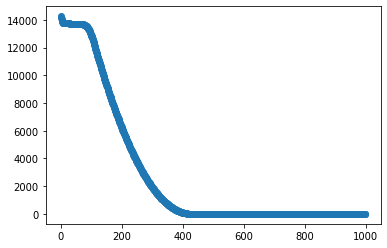

In [80]:
plt.plot(model.cost_itrs,marker='o');
plt.xticks();


In [81]:
# h_theta_itrs=np.array(model.h_theta_itrs)

In [82]:
# h_theta_itrs[1,:].shape

In [83]:
# X_train.shape

In [84]:
# for i in range (131):
#     plt.scatter(X_train,y_train)
#     plt.plot(X_train,h_theta_itrs[i,:])
# #     plt.show()